![title](hw_img/hw2.1.jpg)
![title](hw_img/hw2.2.jpg)
![title](hw_img/hw2.3.jpg)

### import frequently used packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
np.random.seed(1)
x = np.linspace(-2,2,200)
signal = 2 + 5 * x + 7 * np.power(x,2) + 8 * np.power(x,3)
noise = np.random.normal(0, 0.2, 200)
y = signal + noise

x_train = x[0:160]
y_train = y[0:160]

x_test = x[160:]
y_test = y[160:]

In [5]:
def calculate_H(data, degree):
    H = np.column_stack([np.power(data, i) for i in range(0, degree+1)])
    return H
    
def calculate_A(H, data):
    temp = inv(np.dot(np.transpose(H), H))
    A = np.dot(np.dot(temp, np.transpose(H)), data)
    return A

def calculate_HA(H, A):
    HA = np.dot(H, A)
    return HA

def calculate_error(data, HA):
    error = np.sqrt(np.sum(np.dot(np.transpose(data - HA), data - HA)))
    return error

def summary_data(degree):
    H_train = calculate_H(x_train, degree)
    H_test = calculate_H(x_test, degree)

    A = calculate_A(H_train, y_train)

    HA_train = calculate_HA(H_train, A)
    HA_test = calculate_HA(H_test, A)

    summary_data.error_train = calculate_error(y_train, HA_train)
    summary_data.error_test = calculate_error(y_test, HA_test)
    
    plt.plot(x, y, 'b')
    plt.plot(x_train, HA_train, 'r')
    plt.plot(x_test, HA_test, 'g')


63.73012363895636
298.1310824784908


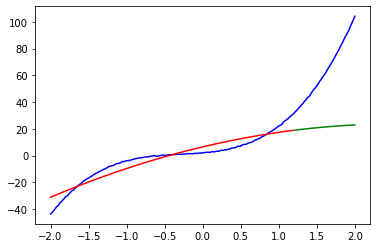

In [6]:
summary_data(2)
print(summary_data.error_train)
print(summary_data.error_test)

2.2698837844838664
1.1547654467137403


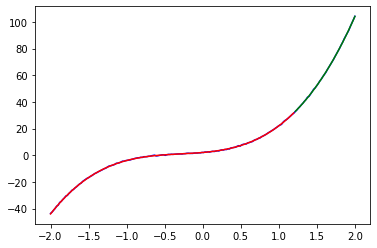

In [7]:
summary_data(3)
print(summary_data.error_train)
print(summary_data.error_test)

2.2494823556639787
39.552918522611


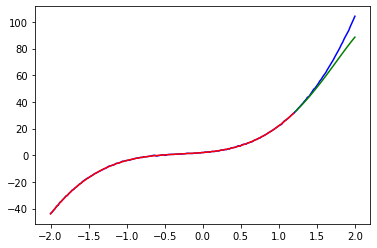

In [8]:
summary_data(8)
print(summary_data.error_train)
print(summary_data.error_test)

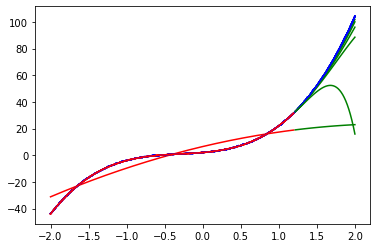

In [9]:
error_train = []
error_test = []
for i in range(2, 10):
    summary_data(i)
    error_train.append(summary_data.error_train)
    error_test.append(summary_data.error_test)

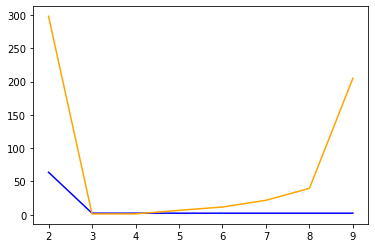

In [11]:
x_axis = [2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x_axis, error_train, 'b')
plt.plot(x_axis, error_test, 'orange')